In [35]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt 
import sympy as simp
from itertools import permutations
from itertools import combinations
from itertools import combinations_with_replacement

1. Cálculo de probabilidad 

In [44]:
#1. 
def problema1(numero_de_espadas,siguientes):
    espadas=1
    a=2
    b=3
    c=4
    lista=[]
    for i in range(13):
        lista.append(a)
        lista.append(b)
        lista.append(c)
    for i in range(numero_de_espadas):
        lista.append(espadas)

    contador=0
    K=int(1e6)
    
    for i in range(K):
        np.random.shuffle(lista)
        sub=lista[:siguientes]
        if np.sum(sub) == siguientes:
            contador+=1

    probabilidad=contador/K
    
    return probabilidad

print(problema1(11,3))
print(problema1(10,2))
print(problema1(9,1))


TypeError: 'Add' object is not callable

In [ ]:
#2. 
def probabilidad_epidemia(N):
    proba_vac = [1] * 2 + [0] * 8
    proba_nvac = [1] * 9 + [0] * 1
    expuesto = [1] * 6 + [0] * 4
    exito = 0

    for _ in range(N):
        exp_vac = np.random.choice(expuesto, 1)[0]
        vac = False

        if exp_vac == 1:
            enfermo = np.random.choice(proba_vac, 1)[0]
            if enfermo == 1:
                exito += 1
                vac = True

        exp_nvac = np.random.choice(expuesto, 1)[0]
        if exp_nvac == 1 and not vac:
            enfermo_n = np.random.choice(proba_nvac, 1)[0]
            if enfermo_n == 1:
                exito += 1

    return exito / N

N = 10000
resultado = probabilidad_epidemia(N)
print("La probabilidad es:",resultado )


La probabilidad es: 0.595


3. Distribuciones de probabilidad continuas 

In [ ]:
def f(x):
    return (x**2) /3
# a
print(sc.integrate.quad(f,0,1)[0])

# b
print(sc.integrate.quad(f,1,2)[0])

0.11111111111111112
0.7777777777777778


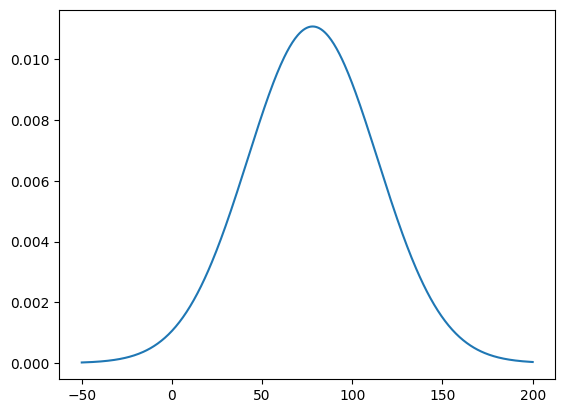

In [ ]:
def normal(x):
    return (1/np.sqrt(2*np.pi*(36**2))) * np.exp(-1/2 * ((x-78)/36)**2)

xx=np.linspace(-50,200,500)
plt.plot(xx,normal(xx))

In [42]:
def normal(x):
    return (1/simp.sqrt(2*np.pi*(36**2))) * simp.exp(-1/2 * ((x-78)/36)**2)

#a
a = sc.integrate.quad(normal,78,np.inf)[0]
print("Probabilidad de que una persona que realice el examen y alcance calificaciones mayores a 72 es: ", a)

#b
aaa=simp.symbols("a")
x_=simp.symbols("x")
funcn=normal(x_)
int=simp.integrate(funcn,(x_,aaa,np.inf))
result=0.1
b = simp.solve(int-result)

print("Calificación mínima para tener una A es: ", b)

#c
c = sc.integrate.quad(normal, -np.inf, np.percentile(normal, 28.1))[0]
print("Punto límite para pasar el 28.1 más alto: ", c)

#d
res_d = 0.25
corte_25 = simp.solve(simp.integrate(funcn, (x_, -np.inf, x_)) - res_d)
d = simp.integrate(funcn, (x_, corte_25[0], np.inf))
print("Proporción de estudiantes con 5 puntos o más arriba del 25% más bajo: ", d)

#e 
res_e = 1 - simp.integrate(funcn, (x_, 72, np.inf)) / (1 - a)
e = simp.solve(simp.integrate(funcn, (x_, 84, np.inf)) / (1 - a) - res_e)
print("Probabilidad de que calificación exceda 84: ", e[0])

Probabilidad de que una persona que realice el examen y alcance calificaciones mayores a 72 es:  0.5
Calificación mínima para tener una A es:  [124.135856359605]


TypeError: unsupported operand type(s) for -: 'function' and 'function'

4. Cadena de Markov

In [34]:
#1. 
pi = np.array([0.25, 0, 0.5, 0.25])

T = np.array([[0.4, 0.2, 0.2, 0.2],
              [0.25, 0.25, 0.25, 0.25],
              [0.3, 0.3, 0.1, 0.3],
              [0.1, 0.1, 0.1, 0.7]])

g = np.array([3,2,1,3,1,0,0,0])

def gen(priori, T, g): 
    conteo = 1 
    for i in g: 
        if conteo == 1: 
            conteo= conteo*priori[i]
            j = i 
        else: 
            conteo = conteo*T[j][i]
            j = i
    return conteo 

prob= gen(pi,T,g)
print("La probabilidad de obtener el gen g es de: ", prob)

#2. 
E= np.array([[0.8, 0, 0, 0.2],
              [0.05, 0.9, 0.1, 0.1],
              [0.05, 0.1, 0.9, 0],
              [0.1, 0, 0, 0.7]])

g_T= np.array([0,1,2,0,2,3,3,3])

States = np.array([0,1])

def GetStates(States,N):
    
    CStates = list( combinations_with_replacement(States,N) )
    
    Permu = []
    
    for it in CStates:
        p = list(permutations(it,N))
    
        
        for i in p:
            if i not in Permu:
                Permu.append(i)
                
    return np.array(Permu)

def GetProb(T,E,obs,state,priori):
    
    n = len(obs)
    probabilidad = 1
    
    probabilidad *= priori[state[0]]

    for i in range(n-1):
        probabilidad *= T[ state[i+1], state[i]  ]
        
    for i in range(n):
        probabilidad *= E[ obs[i], state[i] ]
        
    return probabilidad

HiddenStates = GetStates(States,3)
obs = np.array([1,2,0])



La probabilidad de obtener el gen g es de:  7.500000000000001e-06
